# Trabajo Práctico Semanal 9
Teoria de circuitos II

### Sandomir L Uriel

#### Inicializacion y plantilla de diseño:

In [2]:
# Inicialización e importación de módulos

# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')

# Módulos importantantes
import scipy.signal as sig
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
from splane import plot_plantilla

fig_sz_x = 10
fig_sz_y = 7
fig_dpi = 100 # dpi

fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x,fig_sz_y)
plt.rcParams.update({'font.size':fig_font_size})

###
## Señal de ECG registrada a 1 kHz, con contaminación de diversos orígenes.
###

# para listar las variables que hay en el archivo
#io.whosmat('ecg.mat')
mat_struct = sio.loadmat('ecg.mat')

ecg_one_lead = mat_struct['ecg_lead']
ecg_one_lead = ecg_one_lead.flatten()
cant_muestras = len(ecg_one_lead)

fs = 1000 # Hz
nyq_frec = fs / 2

# Plantilla

# filter design
ripple = 0.5 # dB
atenuacion = 40 # dB

ws1 = 1.0 #Hz
wp1 = 3.0 #Hz
wp2 = 25.0 #Hz
ws2 = 35.0 #Hz

frecs = np.array([0.0,         ws1,         wp1,     wp2,     ws2,         nyq_frec   ]) / nyq_frec
gains = np.array([-atenuacion, -atenuacion, -ripple, -ripple, -atenuacion, -atenuacion])
gains = 10**(gains/20)

#### Filtro FIR

In [3]:
#COMPLETAR

#### Filtro IIR


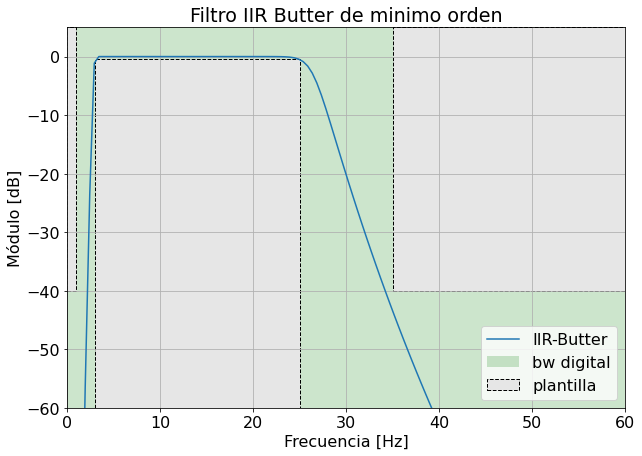

(15, 6)

In [54]:
# # DISEÑO DE FILTRO IIR

# Butter minimo orden
iir_butter_sos = sig.iirdesign(wp = np.array([wp1,wp2])/nyq_frec, ws = np.array([ws1,ws2])/nyq_frec, gpass = ripple, gstop = atenuacion, analog=False, ftype='butter', output='sos')

w, iir_butter = sig.sosfreqz(iir_butter_sos, worN = 1024)

# renormalizo el eje de frecuencia
w = w / np.pi * nyq_frec

plt.plot(w, 20*np.log10(np.abs(iir_butter)), label='IIR-Butter' )

plt.title('Filtro IIR Butter de minimo orden')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plt.axis([0, 60, -60, 5 ]);

axes_hdl = plt.gca()
axes_hdl.legend()

plot_plantilla(filter_type = 'bandpass', fpass = frecs[[2, 3]]* nyq_frec, ripple = ripple , fstop = frecs[ [1, 4] ]* nyq_frec, attenuation = atenuacion, fs = fs)

Nmin = iir_butter_sos.shape
Nmin

Se obtiene una muy buena respuesta en modulo y una planicidad muy atractiva en la banda de paso a costa de un orden relativamente alto.
<br><br>

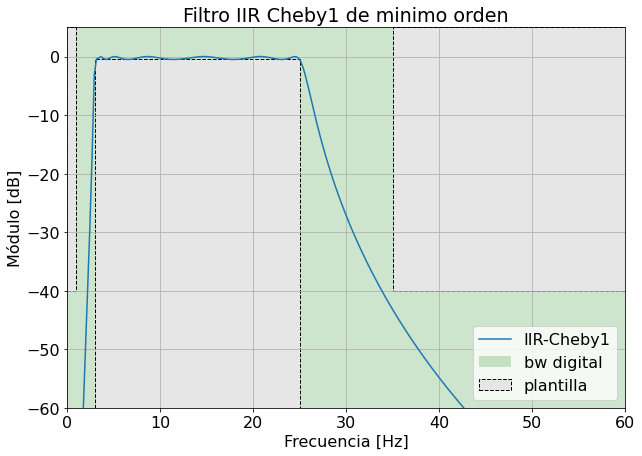

(7, 6)

In [55]:
# Cheby 1 de minimo orden

iir_cheby1_sos = sig.iirdesign(wp = np.array([wp1,wp2])/nyq_frec, ws = np.array([ws1,ws2])/nyq_frec, gpass = ripple, gstop = atenuacion, analog=False, ftype='cheby1', output='sos')

w, iir_cheby1 = sig.sosfreqz(iir_cheby1_sos, worN = 2048)

# renormalizo el eje de frecuencia
w = w / np.pi * nyq_frec

plt.plot(w, 20*np.log10(np.abs(iir_cheby1)), label='IIR-Cheby1' )

plt.title('Filtro IIR Cheby1 de minimo orden')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plt.axis([0, 60, -60, 5 ]);

axes_hdl = plt.gca()
axes_hdl.legend()

plot_plantilla(filter_type = 'bandpass', fpass = frecs[[2, 3]]* nyq_frec, ripple = ripple , fstop = frecs[ [1, 4] ]* nyq_frec, attenuation = atenuacion, fs = fs)

Nmin = iir_cheby1_sos.shape
Nmin

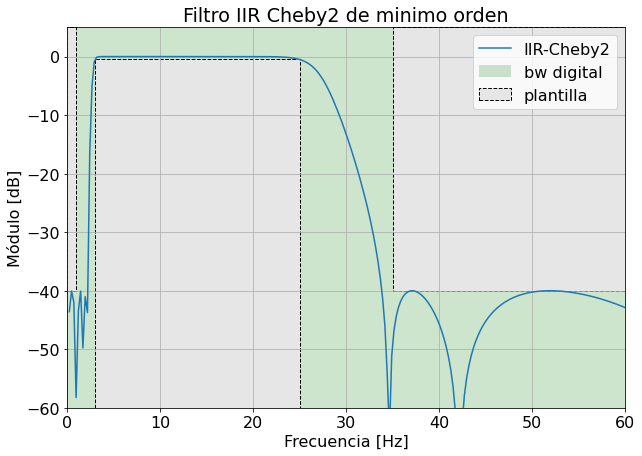

(7, 6)

In [52]:
# Cheby 2 de minimo orden

iir_cheby2_sos = sig.iirdesign(wp = np.array([wp1,wp2])/nyq_frec, ws = np.array([ws1,ws2])/nyq_frec, gpass = ripple, gstop = atenuacion, analog=False, ftype='cheby2', output='sos')

w, iir_cheby2 = sig.sosfreqz(iir_cheby2_sos, worN = 2048)

# renormalizo el eje de frecuencia
w = w / np.pi * nyq_frec

plt.plot(w, 20*np.log10(np.abs(iir_cheby2)), label='IIR-Cheby2' )

plt.title('Filtro IIR Cheby2 de minimo orden')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plt.axis([0, 60, -60, 5 ]);

axes_hdl = plt.gca()
axes_hdl.legend()

plot_plantilla(filter_type = 'bandpass', fpass = frecs[[2, 3]]* nyq_frec, ripple = ripple , fstop = frecs[ [1, 4] ]* nyq_frec, attenuation = atenuacion, fs = fs)

Nmin = iir_cheby2_sos.shape
Nmin

Para el caso de los chebys, obtenemos filtros que cumplen con la plantilla de un orden minimo igual para ambos casos, sin embargo nos interesa que las amplitudes de las señales con frecuencias dentro de la BW se deformen lo menos posible, por lo que el Chebyshev 2 que nos brinda un ripple mas uniforme, nos proporciona una mejor respuesta para esta aplicacion.
<br><br>

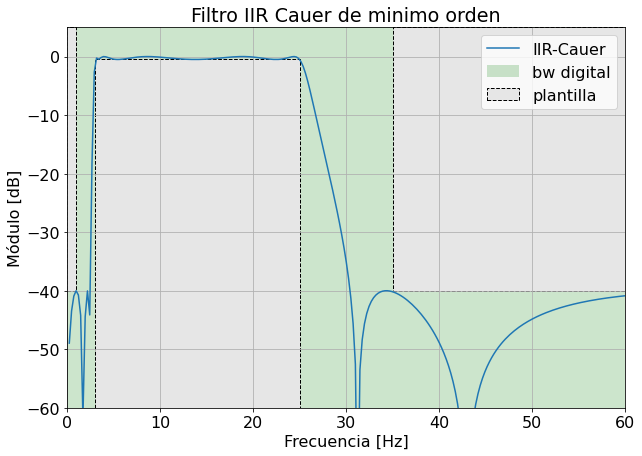

(5, 6)

In [57]:
# Cauer de minimo orden

iir_cauer_sos = sig.iirdesign(wp = np.array([wp1,wp2 ])/nyq_frec, ws = np.array([ws1,ws2])/nyq_frec, gpass = ripple, gstop = atenuacion, analog=False, ftype='ellip', output='sos')

w, iir_cauer = sig.sosfreqz(iir_cauer_sos, worN = 2048)

# renormalizo el eje de frecuencia
w = w / np.pi * nyq_frec

plt.plot(w, 20*np.log10(np.abs(iir_cauer)), label='IIR-Cauer' )

plt.title('Filtro IIR Cauer de minimo orden')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plt.axis([0, 60, -60, 5 ]);

axes_hdl = plt.gca()
axes_hdl.legend()

plot_plantilla(filter_type = 'bandpass', fpass = frecs[[2, 3]]* nyq_frec, ripple = ripple , fstop = frecs[ [1, 4] ]* nyq_frec, attenuation = atenuacion, fs = fs)

Nmin = iir_cauer_sos.shape
Nmin

Observamos que para un filtro del tipo Cauer, se cumple la plantilla para un orden menor a costa de tener ripple uniforme.
<br><br>
